# 1. Importing and understanding the dataset

In [62]:
import pandas as pd
import numpy as np

from google.colab import files 
uploaded = files.upload()
 
listing = pd.read_csv('listing.csv')

Saving listing.csv to listing (1).csv


In [63]:
from google.colab import files 
uploaded = files.upload()

review = pd.read_csv('review.csv')

Saving review.csv to review (2).csv


In [64]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5257 entries, 0 to 5256
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   listing_id                5257 non-null   int64  
 1   zipcode                   4039 non-null   float64
 2   latitude                  5257 non-null   float64
 3   longitude                 5257 non-null   float64
 4   property_type             5257 non-null   object 
 5   room_type                 5257 non-null   object 
 6   bathrooms                 4071 non-null   float64
 7   bedrooms                  5168 non-null   float64
 8   beds                      5229 non-null   float64
 9   minimum_nights            5257 non-null   int64  
 10  host_listings_count       5257 non-null   int64  
 11  instant_bookable          5257 non-null   object 
 12  cancellation_policy       4072 non-null   object 
 13  is_business_travel_ready  3662 non-null   object 
 14  price_pe

In [65]:
listing.describe()

,listing_id,zipcode,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,price_per_person
count,5.257000e+03,4039.000000,5257.000000,5257.000000,4071.000000,5168.000000,5229.000000,5257.000000,5257.000000,5257.000000
mean,2.808420e+07,28794.561525,35.576742,-82.560238,1.396217,1.712461,2.204628,5.161499,85.395282,58.900833
std,1.543715e+07,31.456561,0.047854,0.047946,0.763237,1.218743,1.705063,13.826537,662.112993,300.183795
min,3.858500e+04,28701.000000,35.407400,-82.770131,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.557913e+07,28801.000000,35.564360,-82.592560,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
50%,2.797783e+07,28804.000000,35.586281,-82.558290,1.000000,1.000000,2.000000,2.000000,1.000000,35.000000
75%,4.217439e+07,28806.000000,35.604770,-82.528990,2.000000,2.000000,3.000000,2.000000,4.000000,50.000000
max,5.381698e+07,29710.000000,35.685558,-82.417304,12.500000,34.000000,21.000000,365.000000,7755.000000,12499.500000


In [66]:
# Checking missing values - there are some missing values for columns 'zipcode', 'bathrooms', 'bedrooms', 'beds', 'cancellation_policy', and 'is_business_travel_ready'   
listing.isnull().sum()

listing_id                     0
zipcode                     1218
latitude                       0
longitude                      0
property_type                  0
room_type                      0
bathrooms                   1186
bedrooms                      89
beds                          28
minimum_nights                 0
host_listings_count            0
instant_bookable               0
cancellation_policy         1185
is_business_travel_ready    1595
price_per_person               0
host_is_superhost              0
dtype: int64

In [67]:
# Checking duplicates - there is no duplicate listings where all columns are idential
listing.duplicated().sum()

0

In [68]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147339 entries, 0 to 147338
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   review_id      147339 non-null  int64  
 1   listing_id     147339 non-null  int64  
 2   date           147339 non-null  object 
 3   reviewer_id    147339 non-null  int64  
 4   reviewer_name  147339 non-null  object 
 5   sentiment      147339 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.7+ MB


In [69]:
review.describe()

,review_id,listing_id,reviewer_id,sentiment
count,1.473390e+05,1.473390e+05,1.473390e+05,147339.000000
mean,1.877395e+08,1.141278e+07,6.653603e+07,0.380812
std,1.067412e+08,7.805519e+06,5.794581e+07,0.187726
min,1.987970e+05,3.858500e+04,6.100000e+01,-1.016667
25%,9.388728e+07,4.045013e+06,1.970705e+07,0.265825
50%,1.948376e+08,1.170103e+07,4.820984e+07,0.363233
75%,2.790624e+08,1.793540e+07,1.025723e+08,0.475000
max,3.649326e+08,3.105452e+07,2.331770e+08,2.967021


In [70]:
# Checking missing values - there is no missing values
review.isnull().sum()

review_id        0
listing_id       0
date             0
reviewer_id      0
reviewer_name    0
sentiment        0
dtype: int64

In [71]:
# Checking duplicates - there is no duplicate reviews where all columns are idential
review.duplicated().sum()

0

# 2. Exploratory data analyses

In [72]:
# Merging the listing and review datasets
lr = pd.merge(listing, review, on='listing_id', how='outer')
lr.head()

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,instant_bookable,cancellation_policy,is_business_travel_ready,price_per_person,host_is_superhost,review_id,date,reviewer_id,reviewer_name,sentiment
0,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,198797.0,3/14/2011,411638.0,Jessienne,0.639601
1,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,201932.0,3/17/2011,441855.0,Bill,0.861001
2,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,341616.0,6/28/2011,657560.0,Joakim,0.718540
3,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,369937.0,7/12/2011,792195.0,Gabrielle,0.507613
4,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,moderate,f,30.0,t,376614.0,7/16/2011,768992.0,Horst,0.262807


## 2.1 Analysis of reviews by zip code

### Summary of key insights:
* Of the reviews with zip code information (99% of total reviews in the merged dataset), the top 5 zip codes make up 94%, with the top 2 accounting for nearly 60% 
* Average sentiment score by zip code ranges from 0.23 to 0.44, with zip code 28815 having the highest score (ranked 1st) on average and zip code 28730 having a significantly lower score (ranked 14th) than the rest. The difference between rank 14 and rank 13 is 0.09 while the difference between rank 13 and rank 2 is 0.07!
* 5 out of the 14 zip codes in the dataset have higher average sentiment scores than the overall average sentiment score (based on all reviews with zipcode information). 9 zip codes have lower average sentiment score than the overall average and 3 do not have sentiment score information
* Considering both the review count and sentiment score information, zip codes 28806 and 28803 perform the best, with a high number of reviews and high sentiment scores. Meanwhile, zip codes 28801 and 28805 have a relatively high number of reviews but slightly lower sentiment scores. Interestingly, the highest rated zip code (28815) and the lowest rated zip code (28730) are the least reviewed (with lowest review counts). More in-depth analyses and investigation should be conducted to explore the reasons behind their performance

### **Insight 1**: Of the reviews with zip code information (99% of total reviews in the merged dataset), the top 5 zip codes make up 94%, with the top 2 accounting for nearly 60% 

In [73]:
# Total number of reviews per zip code
rByZipcode = lr.groupby('zipcode')[['review_id']].count()
rByZipcode.rename(columns={'review_id': 'rCount'}, inplace=True) # Rename column to reflect count

# Adding a column to show the relative size of the review count for each zip code (as a percentage of total reviews)
totalReview = rByZipcode['rCount'].sum()
rByZipcode['rPercent'] = rByZipcode['rCount'] / totalReview * 100
rByZipcode.sort_values(by='rCount', ascending=False, inplace=True)
rByZipcode

,rCount,rPercent
zipcode,,
28806.0,46772,32.001642
28801.0,39344,26.919366
28803.0,18530,12.678321
28805.0,17131,11.721118
28804.0,15666,10.718757
28704.0,4155,2.842872
28715.0,2499,1.709829
28732.0,1691,1.156991
28748.0,170,0.116315


In [74]:
# Calculating the total number of reviews and number of reviews with zipcode information
print(lr['review_id'].count())
print(totalReview)
print(totalReview/lr['review_id'].count())

147339
146155
0.9919641099776706


In [75]:
# Calculating the combined share of the top 5 and top 2 zipcodes with the highest number of reviews
print(rByZipcode['rPercent'].head(5).sum())
print(rByZipcode['rPercent'].head(2).sum())

94.0392049536451
58.9210085183538


In [76]:
# Alternative methods to calculate the combined shares
print(rByZipcode.iloc[:5,1].sum())
print(rByZipcode.iloc[:2,1].sum())

94.0392049536451
58.9210085183538


### **Insight 2**: Average sentiment score by zip code ranges from 0.23 to 0.44, with zip code 28815 having the highest score (ranked 1st) on average and zip code 28730 having a significantly lower score (ranked 14th) than the rest. The difference between rank 14 and rank 13 is 0.09 while the difference between rank 13 and rank 2 is 0.07! 

In [77]:
# Calculating the average sentiment score per zip code
sByZipcode = lr.groupby('zipcode')[['sentiment']].mean()
sByZipcode.rename(columns={'sentiment': 'avgSentiment'}, inplace=True) # Rename column to reflect average sentiment score

# Sorting the results by average sentiment score and adding a column to show the rank of each zip code
sByZipcode.sort_values(by='avgSentiment', ascending=False, inplace=True)
sByZipcode['sRank'] = sByZipcode['avgSentiment'].rank(ascending=False)
sByZipcode

,avgSentiment,sRank
zipcode,,
28815.0,0.437491,1.0
28732.0,0.392760,2.0
28803.0,0.389715,3.0
28806.0,0.384278,4.0
28704.0,0.382080,5.0
28804.0,0.377612,6.0
28801.0,0.376376,7.0
28805.0,0.376374,8.0
28701.0,0.366561,9.0


### **Insight 3**: 5 out of the 14 zip codes in the dataset have higher average sentiment scores than the overall average sentiment score (based on all reviews with zipcode information). 9 zip codes have lower average sentiment score than the overall average and 3 do not have sentiment score information   

In [78]:
# Average sentiment score of all listings with zipcode information
lr[~lr['zipcode'].isnull()]['sentiment'].mean()

0.38081752517963813

### **Insight 4**: Considering both the review count and sentiment score information, zip codes 28806 and 28803 perform the best, with a high number of reviews and high sentiment scores. Meanwhile, zip codes 28801 and 28805 have a relatively high number of reviews but slightly lower sentiment scores. Interestingly, the highest rated zip code (28815) and the lowest rated zip code (28730) are the least reviewed (with lowest review counts). More in-depth analyses and investigation should be conducted to explore the reasons behind their performance

In [79]:
# Combining the review count per zip code and average sentiment score per zip code 
ZipcodeReview = pd.merge(rByZipcode, sByZipcode, on='zipcode', how='outer')
ZipcodeReview

,rCount,rPercent,avgSentiment,sRank
zipcode,,,,
28806.0,46772,32.001642,0.384278,4.0
28801.0,39344,26.919366,0.376376,7.0
28803.0,18530,12.678321,0.389715,3.0
28805.0,17131,11.721118,0.376374,8.0
28804.0,15666,10.718757,0.377612,6.0
28704.0,4155,2.842872,0.382080,5.0
28715.0,2499,1.709829,0.365012,10.0
28732.0,1691,1.156991,0.392760,2.0
28748.0,170,0.116315,0.353509,12.0


## 2.2 Analysis of reviews by year and season


### Summary of key insights:
* The number of reviews for the city in the dataset was first reported with a small base (130 reviews in 2011) and increased substantially over the reporting period (to 59,665 reviews in 2018). The growth rate was the most remarkable during the first 5 years (by 4.7 times between 2011-2012 and 1.6-1.9 times thereafter). Reviews continued to have a steady but slower growth during 2015-2018, with 2015-2016 being the period with the lowest growth rate compared to other years in the dataset
* The average sentiment score for the city fluctuated slightly during 2011-2018 and fell within the range of 0.37-0.38 across most of the years. The percentage change in the average sentiment score during the reporting period was relatively small, at less than 5% for most years. The average sentiment score generally increased with only two exceptions (2011-2012 and 2013-2014) having a negative change in the score. Given a substantially larger number of reviews in the second half (2015-2018), the steadily increasing average sentiment score is a strong evidence of continually improving performance of the listed properties
* In terms of seasonality, October recorded the highest number of reviews during the reporting period. This could be an indication of the higher number of travellers visiting Asheville during autumn. The number of reviews in October is 26% higher than the second most reviewed month (July) and more than 3 times higher than the least reviewed month (February)

In [80]:
# Adding a new column for to extract the year of review
lr['year']=pd.to_datetime(lr['date']).dt.year
lr.head()

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,cancellation_policy,is_business_travel_ready,price_per_person,host_is_superhost,review_id,date,reviewer_id,reviewer_name,sentiment,year
0,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,moderate,f,30.0,t,198797.0,3/14/2011,411638.0,Jessienne,0.639601,2011.0
1,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,moderate,f,30.0,t,201932.0,3/17/2011,441855.0,Bill,0.861001,2011.0
2,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,moderate,f,30.0,t,341616.0,6/28/2011,657560.0,Joakim,0.718540,2011.0
3,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,moderate,f,30.0,t,369937.0,7/12/2011,792195.0,Gabrielle,0.507613,2011.0
4,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,moderate,f,30.0,t,376614.0,7/16/2011,768992.0,Horst,0.262807,2011.0


### **Insight 1**: The number of reviews for the city in the dataset was first reported with a small base (130 reviews in 2011) and increased substantially over the reporting period (to 59,665 reviews in 2018). The growth rate was the most remarkable during the first 5 years (by 4.7 times between 2011-2012 and 1.6-1.9 times thereafter). Reviews continued to have a steady but slower growth during 2015-2018, with 2015-2016 being the period with the lowest growth rate compared to other years in the dataset 

In [81]:
# Calculating total number of reviews per year
rByYear = lr.groupby('year')[['review_id']].count()
rByYear.rename(columns={'review_id': 'rCount'}, inplace=True) # Rename column to reflect count

# Adding a column to show the annual growth rate (percent change) of the review count
rByYear['rCountGrowth'] = rByYear['rCount'].pct_change()
rByYear

,rCount,rCountGrowth
year,,
2011.0,130,NaN
2012.0,735,4.653846
2013.0,2054,1.794558
2014.0,5960,1.901655
2015.0,15691,1.632718
2016.0,23155,0.475687
2017.0,39949,0.725286
2018.0,59665,0.493529


### **Insight 2**: The average sentiment score for the city fluctuated slightly during 2011-2018 and fell within the range of 0.37-0.38 across most of the years. The percentage change in the average sentiment score during the reporting period was relatively small, at less than 5% for most years. The average sentiment score generally increased with only two exceptions (2011-2012 and 2013-2014) having a negative change in the score. Given a substantially larger number of reviews in the second half (2015-2018), the steadily increasing average sentiment score is a strong evidence of continually improving performance of the listed properties   

In [82]:
# Calculating average sentiment score per year
sByYear = lr.groupby('year')[['sentiment']].mean()
sByYear.rename(columns={'sentiment': 'avgSentiment'}, inplace=True) # Rename column to reflect average sentiment score

# Adding a column to show the percent change of the average score by year
sByYear['avgSentimentChange'] = sByYear['avgSentiment'].pct_change()
sByYear

,avgSentiment,avgSentimentChange
year,,
2011.0,0.408427,NaN
2012.0,0.378910,-0.072272
2013.0,0.379679,0.002030
2014.0,0.367379,-0.032395
2015.0,0.369193,0.004938
2016.0,0.371065,0.005070
2017.0,0.377564,0.017513
2018.0,0.391170,0.036038


### **Insight 3**: In terms of seasonality, October recorded the highest number of reviews during the reporting period. This could be an indication of the higher number of travellers visiting Asheville during autumn. The number of reviews in October is 26% higher than the second most reviewed month (July) and more than 3 times higher than the least reviewed month (February) 

In [83]:
# Adding a new column for to extract the month of review

lr['month']=pd.to_datetime(lr['date']).dt.month
lr.head()

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,is_business_travel_ready,price_per_person,host_is_superhost,review_id,date,reviewer_id,reviewer_name,sentiment,year,month
0,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,30.0,t,198797.0,3/14/2011,411638.0,Jessienne,0.639601,2011.0,3.0
1,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,30.0,t,201932.0,3/17/2011,441855.0,Bill,0.861001,2011.0,3.0
2,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,30.0,t,341616.0,6/28/2011,657560.0,Joakim,0.718540,2011.0,6.0
3,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,30.0,t,369937.0,7/12/2011,792195.0,Gabrielle,0.507613,2011.0,7.0
4,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,f,30.0,t,376614.0,7/16/2011,768992.0,Horst,0.262807,2011.0,7.0


In [84]:
rByMonth = lr.groupby('month')[['review_id']].count()
rByMonth.sort_values(by = 'review_id', ascending = False)

,review_id
month,
10.0,19286
7.0,15261
8.0,14437
9.0,14137
11.0,14121
12.0,12459
6.0,12224
5.0,11960
4.0,11324


## 2.3 Analysis of reviews by reviewer

### Summary of key insights:
* The reviewer with reviewer id of 20741182 posted the maximum number of reviews during the given reporting period, at 43 reviews in total
* The name of the most active reviewer is Connor. His reviews were quite recent (all were posted during 2017-2018) and diverse (covering 5 different zip codes and 37 listings, and prices ranging from 14 to 72 per person per night). He provided reviews for both "good" and "bad" experiences, with sentiment scores raning from 0.08 to 0.74.

### **Insight 1**: The reviewer with reviewer id of 20741182 posted the maximum number of reviews during the given reporting period, at 43 reviews in total	

In [85]:
# Calculating the number of reviews by reviewer (reviewer_id)
rByReviewer = lr.groupby('reviewer_id')[['review_id']].count()
rByReviewer.rename(columns={'review_id': 'rCount'}, inplace=True) # Rename column to reflect count

# Sorting the results by review count in descending order to identify reviewer_id with the maximum number of reviews
rByReviewer.sort_values(by='rCount', ascending=False, inplace=True)
rByReviewer 

,rCount
reviewer_id,
20741182.0,43
54752689.0,36
13139.0,23
126613729.0,22
43794383.0,16
...,...
31803233.0,1
31802972.0,1
31801872.0,1


### **Insight 2**: The name of the most active reviewer is Connor. His reviews were quite recent (all were posted during 2017-2018) and diverse (covering 5 different zip codes and 37 listings, and prices ranging from 14 to 72 per person per night). He provided reviews for both "good" and "bad" experiences, with sentiment scores raning from 0.08 to 0.74.   

In [86]:
# Identifying the name and relevant information of the reviewer_id with the maximum number of reviews
lrMax = lr[lr['reviewer_id'] == 20741182.0]
lrMax

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,is_business_travel_ready,price_per_person,host_is_superhost,review_id,date,reviewer_id,reviewer_name,sentiment,year,month
5422,495111,28801.0,35.603710,-82.556210,Private room in residential home,Private room,1.0,0.0,1.0,2,...,f,40.000000,t,292301669.0,7/17/2018,20741182.0,Connor,0.601878,2018.0,7.0
8159,695196,28801.0,35.581310,-82.557410,Private room in residential home,Private room,1.0,1.0,1.0,1,...,f,28.500000,t,234679007.0,2/13/2018,20741182.0,Connor,0.371568,2018.0,2.0
11231,942934,28806.0,35.573120,-82.590920,Private room in residential home,Private room,1.0,1.0,1.0,3,...,f,35.500000,t,197967643.0,9/27/2017,20741182.0,Connor,0.628172,2017.0,9.0
11262,942934,28806.0,35.573120,-82.590920,Private room in residential home,Private room,1.0,1.0,1.0,3,...,f,35.500000,t,252452648.0,4/10/2018,20741182.0,Connor,0.300378,2018.0,4.0
21916,2142139,28806.0,35.586920,-82.574960,Private room in residential home,Private room,1.0,1.0,1.0,1,...,f,32.500000,t,208906529.0,11/3/2017,20741182.0,Connor,0.546003,2017.0,11.0
26805,2847157,28801.0,35.582300,-82.557730,House,Private room,1.0,1.0,1.0,2,...,f,38.500000,t,179826596.0,8/8/2017,20741182.0,Connor,0.288547,2017.0,8.0
27858,3040444,28801.0,35.603290,-82.556170,Entire guest suite,Entire home/apt,1.0,1.0,1.0,2,...,f,51.000000,t,242856778.0,3/13/2018,20741182.0,Connor,0.409351,2018.0,3.0
27881,3040444,28801.0,35.603290,-82.556170,Entire guest suite,Entire home/apt,1.0,1.0,1.0,2,...,f,51.000000,t,273282558.0,6/5/2018,20741182.0,Connor,0.411309,2018.0,6.0
35198,3888565,28804.0,35.629170,-82.539090,House,Private room,1.0,1.0,1.0,1,...,f,44.500000,t,250016670.0,4/3/2018,20741182.0,Connor,0.737211,2018.0,4.0
39115,4191204,28801.0,35.604500,-82.552130,House,Private room,1.5,1.0,1.0,2,...,f,32.500000,t,194049025.0,9/15/2017,20741182.0,Connor,0.393992,2017.0,9.0


In [87]:
lrMax.describe()

,listing_id,zipcode,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,price_per_person,review_id,reviewer_id,sentiment,year,month
count,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,4.300000e+01,43.0,43.000000,43.000000,43.000000
mean,1.360696e+07,28803.209302,35.586532,-82.562922,1.046512,0.976744,1.069767,1.418605,1.674419,38.660853,2.531257e+08,20741182.0,0.394742,2017.674419,6.976744
std,8.248169e+06,2.325410,0.015698,0.024889,0.183029,0.266223,0.337734,0.586862,0.969068,11.983473,5.466319e+07,0.0,0.138782,0.474137,3.405097
min,4.951110e+05,28801.000000,35.550070,-82.629010,1.000000,0.000000,0.000000,1.000000,1.000000,14.000000,1.697867e+08,20741182.0,0.083192,2017.000000,1.000000
25%,6.050818e+06,28801.000000,35.575830,-82.573685,1.000000,1.000000,1.000000,1.000000,1.000000,32.500000,2.105492e+08,20741182.0,0.321236,2017.000000,4.000000
50%,1.542231e+07,28803.000000,35.583380,-82.557850,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,2.428568e+08,20741182.0,0.385357,2018.000000,8.000000
75%,1.983737e+07,28806.000000,35.600020,-82.556190,1.000000,1.000000,1.000000,2.000000,2.000000,46.000000,2.940991e+08,20741182.0,0.461191,2018.000000,10.000000
max,2.817295e+07,28806.000000,35.629170,-82.489940,2.000000,2.000000,2.000000,3.000000,5.000000,72.000000,3.533471e+08,20741182.0,0.737211,2018.000000,12.000000


In [88]:
# Calculating the number of listings and zip codes reviewed by Connor
print(lrMax['listing_id'].nunique())
print(lrMax['zipcode'].nunique())

37
5


## 2.4 Analysis of reviews and sentiment scores by other factors

### Summary of key insights:
* Properties owned by super hosts have higher sentiment score on average, at 5% higher than those not owned by super hosts
* Listings with more flexible cancellation policy consistently enjoy higher sentiment scores on average. The sentiment score for those with 'flexible' cancellation policy is the highest and is 11% higher than those with the strictest cancellation policy (super strict 60)
* Looking at the variation of sentiment scores by price range, the lower the price range, the larger the variation of sentiment score (as demonstrated by the standard deviation of sentiment scores). This could mean that the quality of the cheaper properties vary more significantly than the quality of the more expensive ones

### **Insight 1**: Properties owned by super hosts have higher sentiment score on average, at 5% higher than those not owned by super hosts

In [89]:
# Calculating average sentiment score based on whether the host is a super host
sByHost = lr.groupby('host_is_superhost')[['sentiment']].mean()
sByHost.rename(columns={'sentiment': 'avgSentiment'}, inplace=True) # Rename column to reflect average sentiment score

# Adding a column to show the count for each type of host - both of them have large sample sizes
sByHost['Count'] = lr.groupby('host_is_superhost')[['listing_id']].count()
sByHost

,avgSentiment,Count
host_is_superhost,,
f,0.366561,37541
t,0.385475,112523


### **Insight 2**: Listings with more flexible cancellation policy consistently enjoy higher sentiment scores on average. The sentiment score for those with 'flexible' cancellation policy is the highest and is 11% higher than those with the strictest cancellation policy (super strict 60)

In [90]:
# Calculating average sentiment score by cancellation policy
sByCan = lr.groupby('cancellation_policy')[['sentiment']].mean()
sByCan.rename(columns={'sentiment': 'avgSentiment'}, inplace=True) # Rename column to reflect average sentiment score

# Adding a column to show the count for each cancellation policy - all of them have decent sample sizes
sByCan['Count'] = lr.groupby('cancellation_policy')[['listing_id']].count()
sByCan.sort_values(by = 'avgSentiment', ascending = False)

,avgSentiment,Count
cancellation_policy,,
flexible,0.387140,29968
moderate,0.384066,70074
strict_14_with_grace_period,0.373502,42046
strict,0.367513,5456
super_strict_30,0.365164,238
super_strict_60,0.348029,933


### **Insight 3**: Looking at the variation of sentiment scores by price range, the lower the price range, the larger the variation of sentiment score (as demonstrated by the standard deviation of sentiment scores). This could mean that the quality of the cheaper properties vary more significantly than the quality of the more expensive ones  

In [91]:
# Checking price ranges in the dataset 
lr['price_per_person'].describe()

count    150064.000000
mean         38.680003
std          61.132235
min           0.000000
25%          24.500000
50%          33.500000
75%          46.250000
max       12499.500000
Name: price_per_person, dtype: float64

In [92]:
# Creating a new column to reflect price category 
prices = lr['price_per_person']
bins = [0,lr['price_per_person'].quantile(q=0.2),lr['price_per_person'].quantile(q=0.4),lr['price_per_person'].quantile(q=0.6),lr['price_per_person'].quantile(q=0.8),15000] 
bin_names = ['extra low','low','medium','high','extra high']
lr['price_category'] = pd.cut(prices,bins,labels=bin_names)
lr

,listing_id,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,...,price_per_person,host_is_superhost,review_id,date,reviewer_id,reviewer_name,sentiment,year,month,price_category
0,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,30.0,t,198797.0,3/14/2011,411638.0,Jessienne,0.639601,2011.0,3.0,medium
1,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,30.0,t,201932.0,3/17/2011,441855.0,Bill,0.861001,2011.0,3.0,medium
2,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,30.0,t,341616.0,6/28/2011,657560.0,Joakim,0.718540,2011.0,6.0,medium
3,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,30.0,t,369937.0,7/12/2011,792195.0,Gabrielle,0.507613,2011.0,7.0,medium
4,38585,28804.0,35.65146,-82.62792,Private room in house,Private room,1.0,1.0,2.0,1,...,30.0,t,376614.0,7/16/2011,768992.0,Horst,0.262807,2011.0,7.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150059,53785541,NaN,35.56925,-82.58362,Private room in residential home,Private room,NaN,1.0,NaN,2,...,20.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extra low
150060,53793198,NaN,35.57007,-82.52996,Entire condominium (condo),Entire home/apt,NaN,1.0,NaN,30,...,31.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
150061,53798563,NaN,35.59261,-82.61573,Entire residential home,Entire home/apt,NaN,2.0,2.0,2,...,26.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
150062,53806541,NaN,35.58434,-82.58640,Entire residential home,Entire home/apt,NaN,3.0,3.0,8,...,24.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low


In [93]:
# Calculating average sentiment score by price category
sByPrice = lr.groupby('price_category')[['sentiment']].mean()
sByPrice.rename(columns={'sentiment': 'avgSentiment'}, inplace=True) # Rename column to reflect average sentiment score

# Calculating standard deviation of sentiment score by price category
sByPrice['stanDev'] = lr.groupby('price_category')[['sentiment']].std()
sByPrice

,avgSentiment,stanDev
price_category,,
extra low,0.382980,0.193582
low,0.383541,0.193303
medium,0.381044,0.184790
high,0.378851,0.185482
extra high,0.377604,0.181003


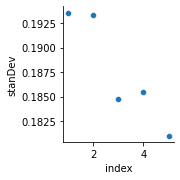

In [94]:
# Plotting the standard deviation of sentiment scores for different price categories
import seaborn as sns
sByPrice['index'] = range(1,6)
sns.pairplot(data=sByPrice, y_vars=['stanDev'], x_vars=['index'])

## 2.5 Analysis of pricing strategy

### Summary of key insights:
* Prices vary significantly across different neighborhoods of Asheville. Among zip codes with a decent number of listings (> 30 listings), 28801 is the most expensive area, 18% higher than the second most expensive area (28804) and 2.7 times the cheapest area (28748). This could be driven my their proximity and ease of access to the city center, with zip code 28801 being the most central neighborhood. Other areas are further away from the city center, with zip code 28748 being the most remote without convenient access to the city through highways or public transport (based on Google Maps)
* There is a large variation in prices across different property type. Among those with a decent number of listings (> 30 listings), 'room in hotel' is the most expensive (at more than 200 per person per night), 30 times higher than the cheapest property type (campsite)
* Interestingly, properties with stricter cancellation policies have higher average price per person. This could be driven by the type of the property and type of host as certain strict cancellation policies (e.g. super strict 30 and super strict 60) are only available to high-end properties on an invitation-only basis
* Average price of properties owned by super host is 11% higher than the rest
* Properties that allow instant booking only have slightly higher price per person on average (0.2%)

### **Insight 1**: Prices vary significantly across different neighborhoods of Asheville. Among zip codes with a decent number of listings (> 30 listings), 28801 is the most expensive area, 18% higher than the second most expensive area (28804) and 2.7 times the cheapest area (28748). This could be driven my their proximity and ease of access to the city center, with zip code 28801 being the most central neighborhood. Other areas are further away from the city center, with zip code 28748 being the most remote without convenient access to the city through highways or public transport (based on Google Maps)       

In [95]:
# Calculating average prices by zip code
pByZipcode = lr.groupby('zipcode')[['price_per_person']].mean()

# Adding a column to show the count for each zipcode to identify potentially biased results due to small sample sizes
pByZipcode['Count'] = lr.groupby('zipcode')[['listing_id']].count()
pByZipcode.sort_values (by = 'price_per_person', ascending=False, inplace=True)

# Filtering the results to show those with decent sample sizes (more than 30 counts)
pByZipcode[pByZipcode['Count'] > 30]

,price_per_person,Count
zipcode,,
28801.0,45.954028,39703
28804.0,38.991131,15847
28805.0,38.190385,17277
28806.0,35.884781,47205
28803.0,34.853563,18751
28787.0,33.114754,61
28732.0,31.227799,1745
28715.0,28.219279,2539
28704.0,27.776234,4249


### **Insight 2**: There is a large variation in prices across different property type. Among those with a decent number of listings (> 30 listings), 'room in hotel' is the most expensive (at more than 200 per person per night), 30 times higher than the cheapest property type (campsite)

In [96]:
# Calculating average prices by property type
pByProperty = lr.groupby('property_type')[['price_per_person']].mean()

# Adding a column to show the count for each property type to identify potentially biased results due to small sample sizes
pByProperty['Count'] = lr.groupby('property_type')[['listing_id']].count()
pByProperty.sort_values (by = 'price_per_person', ascending=True, inplace=True)

# Filtering the results to show those with decent sample sizes (more than 30 counts)
pByProperty[pByProperty['Count'] > 30]

,price_per_person,Count
property_type,,
Campsite,6.714559,87
Private room in condominium (condo),15.875000,40
Treehouse,15.958054,149
Camper/RV,25.511835,683
Private room in cottage,26.567308,130
Shared room in hostel,27.267003,397
Private room in farm stay,27.814421,141
Private room in townhouse,27.910507,487
Tent,27.936404,152


### **Insight 3**: Interestingly, properties with stricter cancellation policies have higher average price per person. This could be driven by the type of the property and type of host as certain strict cancellation policies (e.g. super strict 30 and super strict 60) are only available to high-end properties on an invitation-only basis.  

In [97]:
# Calculating average prices based on cancellation policy of the property
pByCan = lr.groupby('cancellation_policy')[['price_per_person']].mean()

# Adding a column to show the count for each type of cancellation policy - all of them have decent sample sizes
pByCan['Count'] = lr.groupby('cancellation_policy')[['listing_id']].count()
pByCan

,price_per_person,Count
cancellation_policy,,
flexible,35.399176,29968
moderate,37.244870,70074
strict,38.628524,5456
strict_14_with_grace_period,40.962322,42046
super_strict_30,50.398237,238
super_strict_60,130.223953,933


### **Insight 4**: Average price of properties owned by super host is 11% higher than the rest

In [98]:
# Calculating average prices based on whether the host is a super host
pByHost = lr.groupby('host_is_superhost')[['price_per_person']].mean()

# Adding a column to show the count for each type of host - both of them have large sample sizes
pByHost['Count'] = lr.groupby('host_is_superhost')[['listing_id']].count()
pByHost

,price_per_person,Count
host_is_superhost,,
f,35.823969,37541
t,39.632861,112523


### **Insight 5**: Properties that allow instant booking only have slightly higher price per person on average (0.2%)

In [99]:
# Calculating average prices based on whether the property allows instant booking or not
pByBooking = lr.groupby('instant_bookable')[['price_per_person']].mean()

# Adding a column to show the count for each type of booking - both of them have similar sample sizes
pByBooking['Count'] = lr.groupby('instant_bookable')[['listing_id']].count()
pByBooking

,price_per_person,Count
instant_bookable,,
f,38.397750,75115
t,38.962881,74949


#3. Regression analyses for review sentiments

## 3.1 Exploratory analysis and data preparation before running regression models

In [100]:
# Checking missing values 
lr.isnull().sum()

listing_id                      0
zipcode                      2366
latitude                        0
longitude                       0
property_type                   0
room_type                       0
bathrooms                    1356
bedrooms                       89
beds                           28
minimum_nights                  0
host_listings_count             0
instant_bookable                0
cancellation_policy          1349
is_business_travel_ready    11066
price_per_person                0
host_is_superhost               0
review_id                    2725
date                         2725
reviewer_id                  2725
reviewer_name                2725
sentiment                    2725
year                         2725
month                        2725
price_category                  1
dtype: int64

In [101]:
# Dropping missing values
lrclean = lr.dropna(how='any')
lrclean.shape

(136517, 24)

In [102]:
# Calculating correlations between variables
lrclean.corr()

,listing_id,zipcode,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,price_per_person,review_id,reviewer_id,sentiment,year,month
listing_id,1.000000,-0.124130,-0.092229,-0.019338,0.002313,0.065518,0.115858,-0.200292,0.041382,-0.055316,0.605722,0.305399,0.039589,0.586592,0.108010
zipcode,-0.124130,1.000000,0.624789,-0.049779,-0.054487,-0.078413,-0.093479,0.047672,-0.035651,0.080464,-0.083355,-0.080840,0.001742,-0.080881,-0.015566
latitude,-0.092229,0.624789,1.000000,-0.074525,-0.007175,-0.023825,-0.030994,0.061447,-0.006547,0.120591,-0.066334,-0.071829,-0.016988,-0.070216,-0.007504
longitude,-0.019338,-0.049779,-0.074525,1.000000,0.012070,-0.032017,-0.025295,0.026436,0.024471,0.041931,-0.008928,0.015174,-0.003147,-0.009236,0.008866
bathrooms,0.002313,-0.054487,-0.007175,0.012070,1.000000,0.699809,0.607635,-0.002875,0.164828,0.018850,-0.001118,0.004680,-0.029146,-0.002342,0.002382
bedrooms,0.065518,-0.078413,-0.023825,-0.032017,0.699809,1.000000,0.720953,0.041228,0.105761,-0.101394,0.034874,0.022395,-0.025279,0.039131,-0.000062
beds,0.115858,-0.093479,-0.030994,-0.025295,0.607635,0.720953,1.000000,0.007454,0.109361,-0.163728,0.074452,0.048609,-0.034286,0.075659,0.007278
minimum_nights,-0.200292,0.047672,0.061447,0.026436,-0.002875,0.041228,0.007454,1.000000,-0.009414,-0.023342,-0.168820,-0.097309,-0.022801,-0.187853,-0.010871
host_listings_count,0.041382,-0.035651,-0.006547,0.024471,0.164828,0.105761,0.109361,-0.009414,1.000000,0.092233,0.031268,0.012724,-0.015702,0.023654,0.007327
price_per_person,-0.055316,0.080464,0.120591,0.041931,0.018850,-0.101394,-0.163728,-0.023342,0.092233,1.000000,-0.033847,-0.040140,-0.016331,-0.039975,0.002328


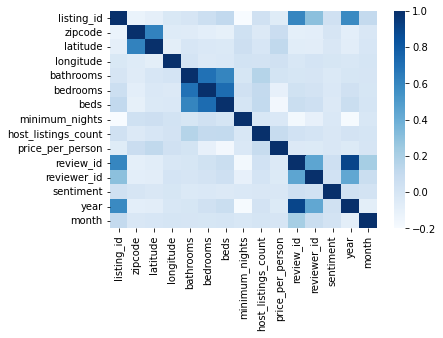

In [103]:
# Drawing a correlation heatmap 
import seaborn as sns
corrmat = lrclean.corr()
sns.heatmap(corrmat, square = False, annot=False, cmap="Blues")

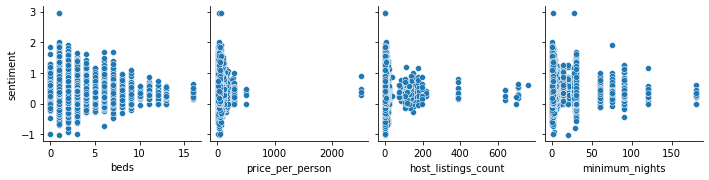

In [104]:
# Drawing pair plots to identify relationships between sentiment and selected numerical variables
sns.pairplot(data=lrclean, y_vars=['sentiment'], x_vars=['beds', 'price_per_person', 'host_listings_count','minimum_nights'])

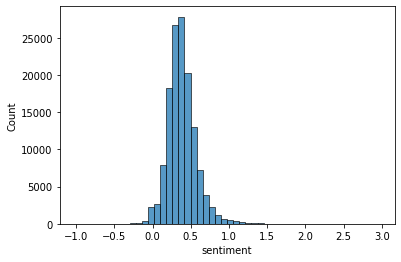

In [105]:
# Checking the distribution of sentiment score to see if there is a need for log transformation 
# The scores are relatively normal with no long tail so it is ok to build regression model directly on sentiment scores

sns.histplot(data=lrclean, x='sentiment', bins=50)

In [106]:
# Transforming selected categorical variables into dummy variables by adding dummy columns and dropping the original categorical columns 
# Note: only those with a small number of categories were transformed for analysis

lrtf = pd.get_dummies(lrclean,columns=['host_is_superhost','instant_bookable', 'cancellation_policy', 'room_type'],drop_first=True)
lrtf.head()

,listing_id,zipcode,latitude,longitude,property_type,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,...,host_is_superhost_t,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,1,0,0,0,0,0,1,0
1,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,1,0,0,0,0,0,1,0
2,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,1,0,0,0,0,0,1,0
3,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,1,0,0,0,0,0,1,0
4,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,1,0,0,0,0,0,1,0


In [107]:
# Creating a new column to show the ratio of baths/beds which is calculated as number of baths dividied by number of beds as an indicator of convenience and level of sharing among guests
def divide(beds, baths):
  if(beds > 0): 
      return baths/beds
  return 0
lrtf['baths/beds'] = lrtf.apply(lambda row: divide(row['beds'], row['bathrooms']), axis=1)
lrtf.head()

,listing_id,zipcode,latitude,longitude,property_type,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,...,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Hotel room,room_type_Private room,room_type_Shared room,baths/beds
0,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,0,1,0,0,0,0,0,1,0,0.5
1,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,0,1,0,0,0,0,0,1,0,0.5
2,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,0,1,0,0,0,0,0,1,0,0.5
3,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,0,1,0,0,0,0,0,1,0,0.5
4,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,0,1,0,0,0,0,0,1,0,0.5


##3.2 Most important factors affecting review sentiment 

### Summary of key insights
After assessing different regression models based on R-squared and removing multicollinearity issues, I have identified following important factors affecting review sentiment:

*   Wether the host is super host (categorical / binary)
*   Number of beds (numerical)
*   Price per person per night (numerical)
*   Ratio of baths/beds which is calculated as number of baths dividied by number of beds as an indicator of convenience and level of sharing among guests (numerical)




In [108]:
# Importing statsmodels
import statsmodels.api as sm

### Alternative 1: Regression model using the above variables without a constant

*   Overall, the model has high significance and fit with an R-squared of 0.767. However, since the intercept is not included, this model might be bisased 
*   All of the independent variables selected are statistically significant (small p-values) and have positive impact on sentiment scores
*   Interestingly, the ratio of baths/beds has the largest impact on review sentiment. An increase of 1 in this ratio will lead to and increase of 0.22 in the sentiment score. This means that bathroom sharing with other people in the same house could be a big concern for airbnb customers. It could potentially affect the level of convenience and cleanliness, which are reflected in sentiment scores
*   Whether the host is super host also affects review sentiment. The model predicts an increase of 0.096 in sentiment scores for properties owned by super hosts
*   The impacts of number of beds and price per person on sentiment scores are positive but smaller than the first two. These variables reflect the usability and quality of the properties, with those having more beds and are in the higher price range reviewed more positively by customers   


In [109]:
y1=lrtf['sentiment']
x1=lrtf[['beds','price_per_person','host_is_superhost_t','baths/beds']]
x1

,beds,price_per_person,host_is_superhost_t,baths/beds
0,2.0,30.0,1,0.5
1,2.0,30.0,1,0.5
2,2.0,30.0,1,0.5
3,2.0,30.0,1,0.5
4,2.0,30.0,1,0.5
...,...,...,...,...
147737,2.0,17.5,1,0.5
147749,2.0,23.4,1,0.5
147751,1.0,40.0,1,1.0
147752,1.0,40.0,1,1.0


In [110]:
model1 = sm.OLS(y1, x1) 
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              sentiment   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                          1.125e+05
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                        0.00
Time:                        23:04:14   Log-Likelihood:                          22377.
No. Observations:              136517   AIC:                                 -4.475e+04
Df Residuals:                  136513   BIC:                                 -4.471e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
beds                    0.0549      0.000    148.510      0.000       0.054       0.056
price_per_person        0.0005   2.17e-05     24.413      0.000       0.000       0.001
host_is_superhost_t     0.0960      0.001     78.939      0.000       0.094       0.098
baths/beds              0.2151      0.001    167.070      0.000       0.213       0.218
==============================================================================
Omnibus:                    19268.000   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69813.650
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                       6.218   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Alternative 2: Adding a constant greatly reduced R-squared. Interestingly, when the constant was included, the impacts of the remaining variables on sentiment scores were modified, with most variables having very small and negative impacts. The only exception is whether the host is super host, which still has statistically significant and positive impact on sentiment scores. This indicates that being super host is an important factor affecting review sentiment 

In [111]:
y2=lrtf['sentiment']
x2=lrtf[['beds','price_per_person','host_is_superhost_t','baths/beds']]
x2=sm.add_constant(x2)
x2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,beds,price_per_person,host_is_superhost_t,baths/beds
0,1.0,2.0,30.0,1,0.5
1,1.0,2.0,30.0,1,0.5
2,1.0,2.0,30.0,1,0.5
3,1.0,2.0,30.0,1,0.5
4,1.0,2.0,30.0,1,0.5
...,...,...,...,...,...
147737,1.0,2.0,17.5,1,0.5
147749,1.0,2.0,23.4,1,0.5
147751,1.0,1.0,40.0,1,1.0
147752,1.0,1.0,40.0,1,1.0


In [112]:
model2 = sm.OLS(y2, x2) 
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.09e-95
Time:                        23:04:14   Log-Likelihood:                 33944.
No. Observations:              136517   AIC:                        -6.788e+04
Df Residuals:                  136512   BIC:                        -6.783e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3849      0.002    158.776      0.000       0.380       0.390
beds                   -0.0054      0.001    -10.576      0.000      -0.006      -0.004
price_per_person       -0.0002   2.05e-05     -8.834      0.000      -0.000      -0.000
host_is_superhost_t     0.0181      0.001     14.819      0.000       0.016       0.020
baths/beds             -0.0013      0.002     -0.694      0.488      -0.005       0.002
==============================================================================
Omnibus:                    27134.240   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115867.656
Skew:                           0.926   Prob(JB):                         0.00
Kurtosis:                       7.116   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.3 Other regression models considered in the analysis

### Adding other variables increased R-squared but created multicollinearity issues. The model below included the following preditors:
*   Wether the host is super host (categorical / binary)
*   Number of beds (numerical)
*   Price per person per night (numerical)
*   Whether the property allows instant booking (categorical)
*   Cancellation policy (categorical)
*   Room type (categorical)
*   Ratio of baths/beds which is calculated as number of baths dividied by number of beds as an indicator of convenience and level of sharing among guests (numerical)

In [113]:
y3=lrtf['sentiment']
x3=lrtf[['beds', 'price_per_person', 'host_is_superhost_t', 'instant_bookable_t', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'baths/beds']]
x3=sm.add_constant(x3)
x3

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,beds,price_per_person,host_is_superhost_t,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Hotel room,room_type_Private room,room_type_Shared room,baths/beds
0,1.0,2.0,30.0,1,0,1,0,0,0,0,0,1,0,0.5
1,1.0,2.0,30.0,1,0,1,0,0,0,0,0,1,0,0.5
2,1.0,2.0,30.0,1,0,1,0,0,0,0,0,1,0,0.5
3,1.0,2.0,30.0,1,0,1,0,0,0,0,0,1,0,0.5
4,1.0,2.0,30.0,1,0,1,0,0,0,0,0,1,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147737,1.0,2.0,17.5,1,0,0,0,0,0,0,0,0,0,0.5
147749,1.0,2.0,23.4,1,0,1,0,0,0,0,0,0,0,0.5
147751,1.0,1.0,40.0,1,1,0,0,0,0,0,0,1,0,1.0
147752,1.0,1.0,40.0,1,1,0,0,0,0,0,0,1,0,1.0


In [114]:
model3 = sm.OLS(y3, x3) 
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     68.12
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.63e-180
Time:                        23:04:14   Log-Likelihood:                 34161.
No. Observations:              136517   AIC:                        -6.829e+04
Df Residuals:                  136503   BIC:                        -6.816e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.3807      0.003    139.619      0.000       0.375       0.386
beds                                               -0.0037      0.001     -7.055      0.000      -0.005      -0.003
price_per_person                                -7.197e-05   2.13e-05     -3.376      0.001      -0.000   -3.02e-05
host_is_superhost_t                                 0.0178      0.001     14.416      0.000       0.015       0.020
instant_bookable_t                                  0.0015      0.001      1.428      0.153      -0.001       0.003
cancellation_policy_moderate                       -0.0002      0.001     -0.172      0.863      -0.003       0.002
cancellation_policy_strict                          0.0037      0.007      0.555      0.579      -0.009       0.017
cancellation_policy_strict_14_with_grace_period    -0.0070      0.002     -4.637      0.000      -0.010      -0.004
cancellation_policy_super_strict_30                 0.0022      0.014      0.152      0.879      -0.026       0.031
cancellation_policy_super_strict_60                -0.0238      0.007     -3.605      0.000      -0.037      -0.011
room_type_Hotel room                                0.0427      0.036      1.199      0.231      -0.027       0.113
room_type_Private room                              0.0235      0.001     18.815      0.000       0.021       0.026
room_type_Shared room                               0.0327      0.008      3.887      0.000       0.016       0.049
baths/beds                                         -0.0111      0.002     -5.866      0.000      -0.015      -0.007
==============================================================================
Omnibus:                    26944.066   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114878.419
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                       7.100   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression model using only numerical variables produced lower R-squared. The model below included the following preditors:
*   Number of beds 
*   Number of bathrooms
*   Host listing count
*   Minimum nights
*   Price per person per night

In [115]:
y4=lrtf['sentiment']
x4=lrtf[['beds', 'price_per_person', 'host_listings_count','minimum_nights','bathrooms']]
x4=sm.add_constant(x4)
x4

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,beds,price_per_person,host_listings_count,minimum_nights,bathrooms
0,1.0,2.0,30.0,1,1,1.0
1,1.0,2.0,30.0,1,1,1.0
2,1.0,2.0,30.0,1,1,1.0
3,1.0,2.0,30.0,1,1,1.0
4,1.0,2.0,30.0,1,1,1.0
...,...,...,...,...,...,...
147737,1.0,2.0,17.5,1,2,1.0
147749,1.0,2.0,23.4,5,1,1.0
147751,1.0,1.0,40.0,2,1,1.0
147752,1.0,1.0,40.0,2,1,1.0


In [116]:
model4 = sm.OLS(y4, x4) 
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     63.95
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           6.86e-67
Time:                        23:04:14   Log-Likelihood:                 33880.
No. Observations:              136517   AIC:                        -6.775e+04
Df Residuals:                  136511   BIC:                        -6.769e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4020      0.002    259.195      0.000       0.399       0.405
beds                   -0.0049      0.001     -9.066      0.000      -0.006      -0.004
price_per_person       -0.0002   2.05e-05     -7.559      0.000      -0.000      -0.000
host_listings_count    -0.0002   4.74e-05     -3.336      0.001      -0.000   -6.52e-05
minimum_nights         -0.0004   4.55e-05     -8.566      0.000      -0.000      -0.000
bathrooms              -0.0031      0.001     -2.328      0.020      -0.006      -0.000
==============================================================================
Omnibus:                    26973.188   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115694.747
Skew:                           0.919   Prob(JB):                         0.00
Kurtosis:                       7.119   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Surprisingly, distance to the city center does not have a strong impact on review sentiment. This could happen due to many reasons, for example, it is possible that the attractions are not concentrated in the city center but scattered around. The model below included the following preditors:
*   Number of beds 
*   Number of bathrooms
*   Host listing count
*   Minimum nights
*   Price per person per night
*   Distance to Asheville city center using longitude and latitude

In [117]:
# Adding a column to calculate the distance from the property to the city center using longitude and latitude (based on Haversine formula)

def haversine(lat1, lon1, lat2, lon2, earth_radius=6371):
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

lrtf['dist'] = lrtf.apply(lambda row: haversine(row.latitude, row.longitude, 35.595031, -82.551651), axis=1)
lrtf.head()

,listing_id,zipcode,latitude,longitude,property_type,bathrooms,bedrooms,beds,minimum_nights,host_listings_count,...,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Hotel room,room_type_Private room,room_type_Shared room,baths/beds,dist
0,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,0,0,0,0,1,0,0.5,9.321677
1,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,0,0,0,0,1,0,0.5,9.321677
2,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,0,0,0,0,1,0,0.5,9.321677
3,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,0,0,0,0,1,0,0.5,9.321677
4,38585,28804.0,35.65146,-82.62792,Private room in house,1.0,1.0,2.0,1,1,...,1,0,0,0,0,0,1,0,0.5,9.321677


In [118]:
y5=lrtf['sentiment']
x5=lrtf[['beds', 'price_per_person', 'host_listings_count','minimum_nights','bathrooms','dist']]
x5=sm.add_constant(x5)
x5

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,beds,price_per_person,host_listings_count,minimum_nights,bathrooms,dist
0,1.0,2.0,30.0,1,1,1.0,9.321677
1,1.0,2.0,30.0,1,1,1.0,9.321677
2,1.0,2.0,30.0,1,1,1.0,9.321677
3,1.0,2.0,30.0,1,1,1.0,9.321677
4,1.0,2.0,30.0,1,1,1.0,9.321677
...,...,...,...,...,...,...,...
147737,1.0,2.0,17.5,1,2,1.0,14.073658
147749,1.0,2.0,23.4,5,1,1.0,6.401036
147751,1.0,1.0,40.0,2,1,1.0,3.382962
147752,1.0,1.0,40.0,2,1,1.0,3.382962


In [119]:
model5 = sm.OLS(y5, x5) 
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     53.82
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.20e-66
Time:                        23:04:20   Log-Likelihood:                 33881.
No. Observations:              136517   AIC:                        -6.775e+04
Df Residuals:                  136510   BIC:                        -6.768e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4006      0.002    232.068      0.000       0.397       0.404
beds                   -0.0050      0.001     -9.207      0.000      -0.006      -0.004
price_per_person       -0.0001   2.08e-05     -7.123      0.000      -0.000      -0.000
host_listings_count    -0.0002   4.74e-05     -3.339      0.001      -0.000   -6.54e-05
minimum_nights         -0.0004    4.6e-05     -8.204      0.000      -0.000      -0.000
bathrooms              -0.0031      0.001     -2.320      0.020      -0.006      -0.000
dist                    0.0003      0.000      1.786      0.074   -2.57e-05       0.001
==============================================================================
Omnibus:                    26960.363   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115613.705
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       7.117   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""